In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statannot import add_stat_annotation
from adjustText import adjust_text

anot = pd.read_csv('aneuploidy_data_NEW_COMPACT.csv',index_col=0)

anot_CCLE = anot.copy()
anot_CCLE.index = anot_CCLE.loc[:,'CCLE_ID']

from cds import plotting

my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
my_order = order=['Diploid','Aneuploid']

In [2]:
from taigapy import TaigaClient
tc = TaigaClient()

gene_effect_rnai_achilles = tc.get(name='demeter2-achilles-5386', version=13, file='gene_effect')
gene_effect_rnai_drive = tc.get(name='demeter2-drive-0591', version=12, file='gene_effect')
gene_effect_crispr_achilles = tc.get(name='avana-public-tentative-19q4-c2df', version=4, file='gene_effect')

public_19Q4_proteincoding_tpm = tc.get(name='depmap-rnaseq-expression-data-ccd0', version=16, file='public_19Q4_proteincoding_tpm')



6

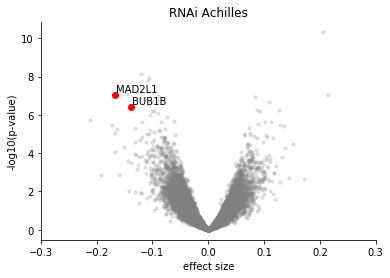

In [6]:
##########################################################################################
######################################### fig 1b #########################################
##########################################################################################



#drive = pd.read_csv('Limma/lim_res_rnai_drive_NEW.csv',index_col=0)
rnai = pd.read_csv('Limma/lim_res_rnai_achilles_NEW.csv',index_col=0)

fix,ax = plt.subplots()
plt.scatter(rnai.loc[:,'EffectSize'],-np.log10(rnai.loc[:,'p.value']),alpha=.2,color='gray',s=10)
plt.scatter(rnai.loc['BUB1B (701)','EffectSize'],-np.log10(rnai.loc['BUB1B (701)','p.value']),color='red')
plt.scatter(rnai.loc['MAD2L1 (4085)','EffectSize'],-np.log10(rnai.loc['MAD2L1 (4085)','p.value']),color='red')
#plt.scatter(rnai.loc['KIF18A (81930)','EffectSize'],-np.log10(rnai.loc['KIF18A (81930)','p.value']),color='red')


plt.xlim(-.3,.3)
plt.xlabel('effect size')
plt.ylabel('-log10(p-value)')
plt.title('RNAi Achilles')
plotting.simpleaxis(ax)

texts = []
for txt in sorted(['BUB1B (701)','MAD2L1 (4085)']):#,'KIF18A (81930)']):
    texts.append(plt.text(rnai.loc[txt,'EffectSize'], -np.log10(rnai.loc[txt,'p.value']),txt.split(' ')[0],color='black'))
adjust_text(texts)
#plt.savefig('fig1c_init/rnai_achilles.pdf')


/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.


RNAi Achilles p-value for BUB1B: 6.73099026394819e-07
RNAi Achilles p-value for MAD2L1: 1.7214833709957065e-07


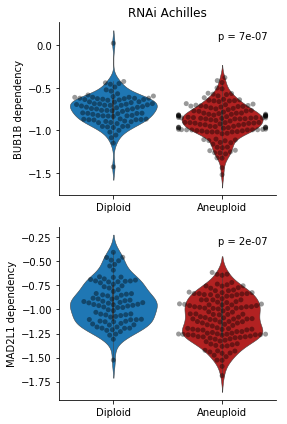

In [11]:
##########################################################################################
######################################### fig 1d #########################################
##########################################################################################

from scipy import stats
fig,axx = plt.subplots(2,1,figsize=(4,6))


shared = set(anot.loc[:,'CCLE_ID']) & set(gene_effect_rnai_achilles.index)
temp = gene_effect_rnai_achilles.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[0],order=['Diploid','Aneuploid'],palette=my_pal)   
sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[0],order=['Diploid','Aneuploid'])
axx[0].set_title('RNAi Achilles')
axx[0].set_ylabel('BUB1B dependency')
axx[0].set_xlabel('')

plotting.simpleaxis(axx[0])


# plt.figure()
sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[1],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[1],order=['Diploid','Aneuploid'])
#axx[1].set_title('RNAi Achilles')
axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('')

plotting.simpleaxis(axx[1])
plt.tight_layout()


tt,p_val = stats.ttest_ind(gene_effect_rnai_achilles.loc[trus,'BUB1B (701)'],gene_effect_rnai_achilles.loc[falsee,'BUB1B (701)'])
print('RNAi Achilles p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,7)),frameon=False)
tt,p_val = stats.ttest_ind(gene_effect_rnai_achilles.loc[trus,'MAD2L1 (4085)'],gene_effect_rnai_achilles.loc[falsee,'MAD2L1 (4085)'])
print('RNAi Achilles p-value for MAD2L1: ' + str(p_val))
axx[1].legend(title='p = '+ str(round(p_val,7)),frameon=False)
#plt.savefig('fig2a/rnai_achilles_lineage_regressed_out.pdf')


/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.


p-value for BUB1B: 0.0005802635400953618
p-value for MAD2L1: 2.7235362597668615e-06


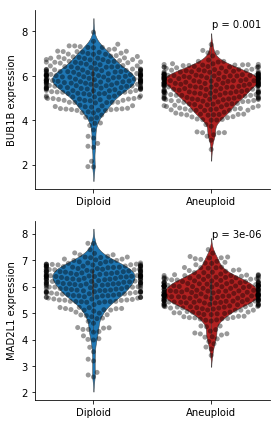

In [12]:
##########################################################################################
######################################### fig 1e #########################################
##########################################################################################

fig,axx = plt.subplots(2,1,figsize=(4,6))


shared = set(anot.index) & set(public_19Q4_proteincoding_tpm.index)
temp = public_19Q4_proteincoding_tpm.loc[shared]
temp['ploidy'] = anot.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'





sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[0],order=my_order,palette = my_pal)
sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[0],order=my_order)


sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[1],order=my_order,palette = my_pal)
sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[1],order=my_order)

axx[0].set_xlabel('')
axx[1].set_xlabel('')

axx[0].set_ylabel('BUB1B expression')
axx[1].set_ylabel('MAD2L1 expression')



from scipy import stats
tt,p_val = stats.ttest_ind(public_19Q4_proteincoding_tpm.loc[trus,'BUB1B (701)'],public_19Q4_proteincoding_tpm.loc[falsee,'BUB1B (701)'])
print('p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,3)),frameon=False)

tt,p_val = stats.ttest_ind(public_19Q4_proteincoding_tpm.loc[trus,'MAD2L1 (4085)'],public_19Q4_proteincoding_tpm.loc[falsee,'MAD2L1 (4085)'])
print('p-value for MAD2L1: ' + str(p_val))

axx[1].legend(title='p = '+ str(round(p_val,6)),frameon=False)





plotting.simpleaxis(axx[0])
plotting.simpleaxis(axx[1])
plt.tight_layout()

#plt.savefig('fig2b/expression.pdf')

6

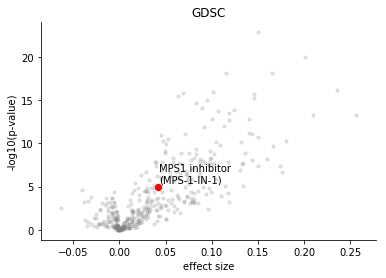

In [13]:
##########################################################################################
######################################### fig 1f #########################################
##########################################################################################

GDSC = pd.read_csv('Limma/drug_comparisons/GDSC_NEW.csv',index_col=0)




drug_name_GDSC = 'MPS-1-IN-1'


fix,ax = plt.subplots()
plt.scatter(GDSC.loc[:,'EffectSize'],-np.log10(GDSC.loc[:,'p.value']),alpha=.2,color='gray',s=10)
plt.scatter(GDSC.loc[drug_name_GDSC,'EffectSize'],-np.log10(GDSC.loc[drug_name_GDSC,'p.value']),alpha=1,color='red',s=40)

#plt.xlim(-1.3,1.3)
plt.xlabel('effect size')
plt.ylabel('-log10(p-value)')
plt.title('GDSC')
plotting.simpleaxis(ax)


texts = []
for txt in sorted([drug_name_GDSC]):#,'KIF18A (81930)']):
    texts.append(plt.text(GDSC.loc[txt,'EffectSize'], -np.log10(GDSC.loc[txt,'p.value']),'MPS1 inhibitor\n(' + txt.split(' ')[0] + ')',color='black'))
adjust_text(texts)
#plt.savefig('fig3b/GDSC.pdf')

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


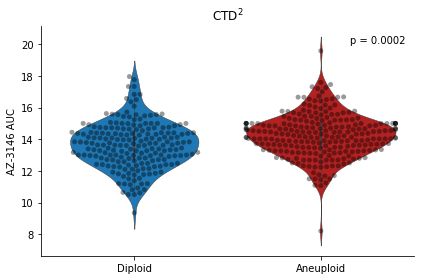

In [16]:
##########################################################################################
######################################### fig 1g #########################################
##########################################################################################

drug_name_CTD = 'AZ-3146'
ctd_matrix = tc.get(name='aneuploidy-data-d0b9', version=7, file='ctd_matrix')
shared = set(anot_CCLE.index) & set(ctd_matrix.index)
temp = ctd_matrix.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'


fig,ax = plt.subplots()
sns.violinplot(y = drug_name_CTD,x='ploidy', data = temp,saturation=1,linewidth=.5,order=my_order,palette = my_pal)
sns.swarmplot(y = drug_name_CTD,x='ploidy', data = temp,color='black',alpha=.4,order=my_order)


plt.xlabel('')
plt.ylabel(drug_name_CTD + ' AUC')
plotting.simpleaxis()
plt.tight_layout()


tt,p_val = stats.ttest_ind(temp.loc[trus,drug_name_CTD].dropna(),temp.loc[falsee,drug_name_CTD].dropna())
ax.legend(title='p = '+ str(round(p_val,4)),frameon=False)
plt.title('CTD$^{2}$')
plt.tight_layout()
#plt.savefig('fig3c/ctd.pdf')

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


p-value for BUB1B: 0.00025700081829972075


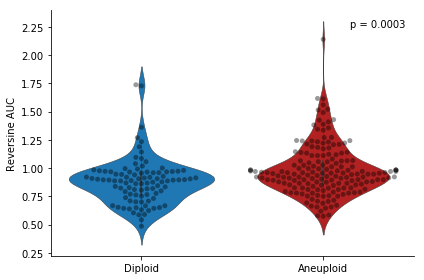

In [20]:
##########################################################################################
######################################### fig 1h #########################################
##########################################################################################


reversine = pd.read_csv('Table S5_Reversine AUC - Table S5_Reversine AUC.csv',index_col=0)


shared = set(anot_CCLE.index) & set(reversine.index)
temp = reversine.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

ax = sns.violinplot(y = 'Reversine',x='ploidy', data = temp,saturation=1,linewidth=.5,order=my_order,palette = my_pal)
sns.swarmplot(y = 'Reversine',x='ploidy', data = temp,color='black',alpha=.4,order=my_order)


from scipy import stats
tt,p_val = stats.ttest_ind(reversine.loc[trus,'Reversine'],reversine.loc[falsee,'Reversine'])
print('p-value for BUB1B: ' + str(p_val))
ax.legend(title='p = '+ str(round(p_val,4)),frameon=False)

plt.xlabel('')
plt.ylabel('Reversine AUC')
plotting.simpleaxis(ax)
plt.tight_layout()
#plt.savefig('fig3d/violin_auc.pdf')